In [1]:
# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 70% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

*Gruppe: Emils Bundzis, Chris Fröschl, Simon Gärtner*

# Kleines Projekt 3: Stufen Aufgabe

## Modellierung eines Stufenabschnittes an einem Berghang

# Dokumentation und SageMath Skript

----

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

## Problembeschreibung
---

Diese Arbeit ist im Rahmen einer vierten Übungsaufgabe in der Vorlesung "Angewandte Mathematik" entstanden.

Es soll ein Weg auf einen Hügel gepflastert bzw. asphaltiert werden. Dafür gibt es einige Anforderungen, welche den Entscheidungsweg zwischen Stufe und Alsplalt bestimmen.

Annahmen:

- Der Weg muss 1,20 m breit sein.
- Asphaltiert werden kann nur, wenn die Steigung kleiner als 1/3 ist
- Die Stufen sind genau 0,20m hoch
- Stufen müssen keine praktikable Länge haben
- Hügelstruktur ist vorgegeben:
    
| Abstand von der Hügelspitze | Höhe des Hügels |
|-----------------------------|-----------------|
| 0                           | 50              |
| 20                          | 47              |
| 40                          | 43              |
| 60                          | 38              |
| 80                          | 32              |
| 100                         | 25              |
| 120                         | 17              |
| 140                         | 8               |
| 160                         | 6               |
| 180                         | 2               |
| 200                         | 0               |


## Mathematisches Modell
---

### Mathematische Problemformulierung

Zur Darstellung der tatsächlichen Hügelstruktur (durch Tabellenwerte) müssen der Abstand von der Hügelspitze und die Höhe des Hügels gebündelt als Koordinaten abspeichert werden.

Das Zahlenpaar (40, 43) bedeutet z.B., dass im horizontalen Abstand
von 40m von der Hügelspitze der Hügel 43 m hoch ist.

Diese Daten müssen daraufhin als Gleichungssystem der Struktur

$$
y = w_3 * x^3 + w_2 * x^2 + w_1 * x + w_0.
$$

dargestellt werden.

Die Gleichungssysteme als Verbund sind jedoch nicht mit einem Polynom der 3. Ordnung lösbar. Um es exakt lösen zu können bräuchte man mindestens ein Polynom des Grades der Anzahl der Gleichungssysteme. Hier 11.

Die Gleichungssysteme können jedoch mittels einer Annährung gelöst werden. Diese Methode heißt auch Methode der kleinsten Quadrate (eng. least square) und wird allgemein dazu verwendet, um eine Datensammlung mit möglich geringen Fehler anzunähern.

![Bild 1](https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg)

Um die Anzahl der benötigten Stufen zu bestimmen, wurde folgender Algorithmus ausgearbeitet:

![Bild 2](get-all-stairs.png)


1. Zunächst werden die Bereiche, in welchen die Steigung größer als 1/3 berechnet. Dies sind die Intervalle, in welchen Treppen platziert werden müssen. Dafür wird einfach die Ableitung der approxmierten Funktion gebildet und als lineares Gleichungssystem auf > $1/3$ für die jeweiligen Intervalle aufgelöst.
2. Von diesen Bereichen wird jeweil die Höhendifferenz bestimmt.
3. Die Höhendifferenz wird dazu verwendent, um die nötige Anzahl der Stufen mit der vom Setup gegebenen Stufenhöhe zu bestimmen
4. Durch die nun gegebene Anzahl der Stufen kann die Länge der Stufen berechnet werden

Da die letzte Stufe meistens in einer Gleikommazahl endet, wird diese als einzige Stufe kürzer als ihre Vorgänger.

Bei diesem Lösungsansatz haben die Stufen jeweils das gleiche Gefälle. Dies funktioniert recht gut, solange unser Gefälle des Hügels nicht zu radikale Änderungen erfährt. Falls doch, kann dies eine Abtragung von Hügelmasse voraussetzen, um die Stufen tatsächlich platzieren zu können.

TODO Bild

Die Länge des Asphaltierten Wegs ergibt sich aus der Differenz zu den bestuften Bereichen.

Dabei lässt sich die Länge einer Kurve $y = f(x)$ im Bereich $[a, b] ⊆ R$ durch das Integral

$$
\int_a^b \sqrt{1 + (f'(x))^2}
$$

berechnen.

### Verwendete Software für die Ergebnisberechnungen

- SageMath

## Implementierung in SageMath & Analyse und Deutung der Ergebnisse
---

### Aufgabe 1

In Aufgabe 1 wird eine Funktion gesucht, die die gegebenen Punkte schneidet. Daher versuchen wir erst die Funktion exakt zu berechnen mit Hilfe eines Gleichungssystems. Wenn dies nicht zu einem Ergebnis führt, suchen wir eine Näherungslösung.

---

Im ersten Abschnitt der Implementierung werden alle benötigten Parameter definiert. So werden die fünf verschiedenen Variablen `w0` bis `w2` und `x` definiert.

Anschließend wird der grundlegende Aufbau der Funktion definert, die die Punkte näherungsweise darstellen soll. Dieser Aufbau wird in der Variablen `model` gespeichert.

Anschließend werden verschiedene Parameter gemäß der Aufgabenstellung festgelegt. Hierzu gehört die Stufenhöhe (`stair_heigt`), die Breite des Weges (`width`) und die maximale Steigung für einen Asphaltweg (`max_gradient`).

In der Liste `points` werden die Messpunkte auf der Aufgabenstellung abgespeichert.

In [2]:
# define all parameters
w0, w1, w2, w3, x = var('w0', 'w1', 'w2', 'w3', 'x')

# define approx model
model(x) = w0 + w1*x + w2*x**2 + w3*x**3

# define stair heigt
stair_height = 0.2

# define width of the street
width = 1.2

# define points
points = [(0, 50), (20, 47), (40, 43), (60, 38), (80, 32), (100, 25), (120, 17), (140, 8), (160, 6), (180, 2), (200, 0)]

# define max gradient
max_gradient = 1/3

Die Methode `createFunction(x, y)` definiert für die übergebenen x und y Werte eine Gleichung mit den unbekannten w's und gibt diese zurück.

In [3]:
def createFunction(x, y):
    """
    Create function (polynom - thrid degree).
    
    Parameters:
        x(float): defines the x value of the function.
        
        y(float): defines the y value of the function.
        
    Returns:
        mathematical function: contains the defined values.
    """
    return w0 + w1*x + w2*x**2 + w3*x**3 == y

Die Methode `getAllFunctions(points)` erstellt für jeden Punkt in der Liste `points` eine Gleichung und fasst diese in einer Liste zusammen.

In [4]:
def getAllFunctions(points):
    """
    Create a list with functions. For each point one. Have the unknown w0, w1, w2 and w3. Creates a list for a linear equation system.
    
    Prameters:
        points(list): contains all specified points.
        
    Returns:
        list: contains all functions for the linear equation system.
    """
    functions = []

    for point in points:
        functions.append(createFunction(point[0], point[1]))
    
    return functions

Die Methode `getExactSolution(points, model)` erstellt eine lineares Gleichungssystem aus den Punkten und dem Polynom dritten Grades und versucht diese exakt zu lösen.

In [5]:
def getExactSolution(points, model):
    """
    Try to solve the linear equation system exactly.
    
    Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        list: contains all values for w0, w1, w2 and w3.
    """
    return solve(getAllFunctions(points), w0, w1, w2, w3)

Da obige Methode zu keinem Ergebnis kommt, wird mit der Methode `getApproxSolution(points, model)` eine Näherungslösung gesucht und zurückgegeben. Die zurückgegebene Funktion liefert dann eine Funktion die bestmöglich alle Punkte schneidet.

In [6]:
def getApproxSolution(points, model):
    """
    If there is no excat solution solve the equation approximately.
    
      Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        dict: contains all values for w0, w1, w2 and w3.
    """
    return find_fit(points,model,solution_dict=True)

Die Methode `plotPointsAndFunction(approx, points)` bekommt die Näherungswerte `w0` bis `w3` und die Punktliste. Mit diesen Werten erstellt sie eine Funktion und plotet diese zusammen mit den Punkten.

In [7]:
def plotPointsAndFunction(approx, points):
    """
    Plot the approximated function and all the points.
    
    Parameters:
        approx(dict): contains all approximated values for the function.
        
        points(list): contains all specified points.
    
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    for element in points:
        g += point(element, color='red', size=30)
        
    return g

### Aufgabe 2

In Aufgabe 2 wird der Bereich der Treppen ermittel und analysiert. Zur Analyse gehört, wie viele Stufen benötigt werden, um diesen Bereich abzudecken und wie lang diese Stufen sein müssen.

---

Die Methode `defineFunction(approx, x)` bekommt die Werte für `w0` bis `w3` und erstellt daraus eine Funktion. Diese Funktion wird dann zurückgeliefert.

In [8]:
def defineFunction(approx, x):
    """
    Calculate function using an approxmation dictonary.
    
    Parmeters:
        approx(dict): Dictonary of approxmation values for the coefficients.
        
        x(float): The input value for which the function will be evaluated.
    
    Returns:
        float: value of function or function itself when x is trasmitted for x
    
    """
    return approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3

Die Methode `getDiffOfFunction(func)` berechnet die Ableitungsfunktion der übergebenen Funktion.

In [9]:
def getDiffOfFunction(func):
    """
    Calcuate the derivation of a function.
    
    Parameters:
        func(mathematical function): Function which should be derive.
        
    Returns:
        mathematical function: derivation of the transmitted function.
    """
    return diff(func)

Die Methode `getGradient(func, x)` setzt den übergebenen x Wert in die übergebene Funktion ein und liefert das Ergebnis zurück. 

In [10]:
def getGradient(func, x):
    """
    Claculate value of a function at a specific point.
    
    Parameters:
        func(mathematical function): function which should be evaluated.
        
        x(float): specifc x value.
    
    Returns:
        float: y value of function at the definied x value.
    """
    return func(x)

Die Methode `getMaxGradient(func, a, b)` berechnet das lokale Mininum in einem übergebenen Interval.

In [11]:
def getMaxGradient(func, a, b):
    """
    Calculate the maximum of a function.
    
    Parameters:
        func(mathematical function): function which should be evaluated.
        
        a(float): start value of evaluated interval.
        
        b(float): start value of evaluated interval.
        
    Return:
        tupel: coordinates of maximum.
    """
    return find_local_minimum(func, a, b)

Die Methode `getMinMaxOfPoints(points)` berechnet den maximalen und minimalen x Wert der Punktliste.

In [12]:
def getMinMaxOfPoints(points):
    """
    Calculate the min x value and the max x value.
    
    Parameters:
        points(list): list which cointains all points
    
    Returns:
        tupel: fst value min x value and snd value max x value
    """
    min_x = 0
    max_x = 0
    
    for point in points:
        min_x = min(point[0], min_x)
        max_x = max(point[0], max_x)
    
    return (min_x, max_x)

Die Methode `getGradientExact(func, max_gradient, points)` berechnet die Intervalle, in denen die Steigung größer oder gleich der übergebenen Steigung `max_gradient` ist und gibt diese als Tupel in einer Liste zurück.

In [13]:
def getGradientExact(func, max_gradient, points):
    """
    Calculate intervals where the gradient is bigger or equal 1/3.
    
    Parameters:
        func(mathematical function): function which schould be evaluated.
        
    Returns:
        list: contains all intervals where the gradient is bigger or equal 1/3.
    """
    max_values = getMinMaxOfPoints(points)
    
    intervals = []
       
    if max_gradient <= abs(getMaxGradient(func, max_values[0], max_values[1])[0]):
    
        sol = solve(func == max_gradient * -1, x, solution_dict = True)

        for index in range(0, len(sol), 2):
            x_min_value = round(sol[index][x], 20)                       
            x_max_value = round(sol[index+1][x], 20)
                        
            if x_min_value < max_values[0]:
                x_min_value = max_values[0]
            
            if x_max_value > max_values[1] - 1:
                x_max_value = max_values[1]
                
            intervals.append((x_min_value, x_max_value))
        
    return intervals

Die Methode `getAllStairs(intervals, func)` berechnet zu jedem Treppenintervall alle Informationen. Hierzu gehören neben dem Start und End x-Wert, der Höhrenunterschied, die Anzahl der Stufen und die Länge der Stufen.

In [14]:
def getAllStairs(intervals, func):
    """
    Calculate and collect all information about the stair intervals.
    
    Parameters:
        intervals(list): contains start and end point of stair interval.
        
        func (mathematical function): function in which the stairs are.
    
    Returns:
        list[dict]: returns a list which include a dictonary with all information about one stair interval.
    """

    allStairs = []

    for interval in intervals:

        difference = abs(getGradient(func, interval[0]) - getGradient(func, interval[1]))

        amountOfStairs = difference / stair_height

        averageLength = (interval[1] - interval[0]) / amountOfStairs

        allStairs.append({'start' : interval[0], 'end': interval[1], 'stair_length': averageLength, 'amountOfStairs': amountOfStairs, 'difference': difference})

    return allStairs

Die Methode `printInformationAsTable(intervals, stair_height)` bekommt alle Informationen über die Stufenintervalle und erstellt eine Tabelle, die alle Informationen nochmal visualisert. Hierbei werden die Werte auch nocheinmal angepasst, dass es z.B. nur eine ganze Anzahl an Stufen gibt. Mit dieser Anpassung werden auch die Längen der Stufen angepasst.

In [15]:
def printInformationAsTable(intervals, stair_height):
    """
    Create a table with all stair information.
    Contains:   - height of stair
                - length of stair
                - amount of stairs with this properties
    
    Parameter:
        intervals(list[dict]): contains all information about the stair intervals.
        
        stair_height(float): defines the height of the stairs (global variable).
        
    Returns:
        Table: with the properties of all stairs.
    """
    
    content = []
    
    for interval in intervals:
        full_stairs = floor(interval['amountOfStairs'])
        roundLength = round(interval['stair_length'], 2)
                
        content.append([round(stair_height, 2), roundLength, full_stairs])
        
        smallerLength = interval['stair_length'] * (interval['amountOfStairs']- full_stairs)
        smallerLength = round(smallerLength, 2)
        
        content.append([round(stair_height, 2), smallerLength, 1])
    
    return table(content, header_row=['Stair height', 'Stair Length', 'Amount'], frame=True, align='center')

Die Methode `paintStairIntervals(intervals, approx)` gibt die Funktion als Plot aus und kennzeichnet in diesem das Stufenintervall.

In [16]:
def paintStairIntervals(intervals, approx):
    """
    Plot the approximate function and mark the stairs area.
    
    Parameters:
    
        intervals(list): contains all information about the stair intervals.
        
        approx(dict): approxmiate coefficients of function.
    
    Returns:
        graphical object: contains all plots.
    """

    g = Graphics()

    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)


    for interval in intervals:
        g += plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, color='red', xmin=interval[0], xmax=interval[1], thickness = 2, legend_label='Steigung zu groß für Asphalt', axes_labels=['Horizontal length', 'Height'], frame=True)

    return g

Die Methode `plotBothFunctions(approx)` plottet einmal die übergebene Funktion und deren Ableitungsfunktion in einen Plot.

In [17]:
def plotBothFunctions(approx):
    """
    Plot two functions. The transmitted one and the derivation of this function.
    
    Parmeters:
        approx(dict): approxmiate coefficients of function.
        
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    h = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, ymin = -10, thickness = 2, legend_label='Approximierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    g += plot(diff(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3), xmax = 200, ymax = 50, ymin = -10, color='red', thickness = 2, legend_label='Abgeleitete Funktion von f', axes_labels=['Horizontal length', 'Height'], frame=True)
    h =  plot(diff(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3), color='red', thickness = 1, xmax = 200, xmin = 0, ymax = 1, ymin = -1)
    
    return g.inset(h, pos=(0.15, 0.25, 0.3, 0.3))

### Aufgabe 3

In Aufgabe 3 werden die entsprechenend Längen berechnet für die Asphaltstraße. Hierfür wird die vorgegebene Funktion verwendet.

---

Die Methode `getLength(func, start, end)` ermittelt die Länge der Funktion zwischen einem `start` und einem `end` Wert.

In [18]:
def getLength(func, start, end):
    """
    Calculate the length of the function in a specific interval.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        start(float): starting x point.
        
        end(float): end x point.
    
    Returns:
        float: length of the function in this interval.
    """
    return integral(sqrt(1 + (func) ** 2), x, start, end)

Die Methode `getAsphaltLength(func, stairInterval)` berechnet die Länge des Asphalt. Hierfür wird zuerst die Gesamtläge berechnet und anschließend die Stufenintervalle wieder abgezogen.

In [19]:
def getAsphaltLength(func, stairInterval):
    """
    Calculate the length of the asphalt street.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        stairInterval(list[dict]): list with all stair intervals -> no asphalt.
        
    Returns:
        float: length of asphalt.
    """

    max_values = getMinMaxOfPoints(points)
    
    length = getLength(func, max_values[0], max_values[1])

    for interval in stairInterval:

        length -= getLength(func, interval['start'], interval['end'])

    return length

### Aufgabe 4

- Asphaltieren: 20 EUR/Quadratmeter
- Stufen: 30 EUR/Quadratmeter (nur horizontale Fläche)

Da die Länge des Asphalts schon in Aufgabe 3 berechnet wurde, kann der Preis ganz einfach berechnet werden:

$$
Preis Asphalt = AsphaltLänge * Wegbreite * AsphaltPreis
$$

Die Kosten der Stufen ist hier selbstverständlich an die zuvor berechneten Stufenintervalle aus Aufgabe 2 gebunden. Dabei iterieren wir über die Intervalle und summieren pro Intervall

$$
IntervallKosten = ( IntervallEnde - IntervallBeginn ) * Wegbreite * 30
$$


---

Die Methode `costCalculationAsphalt(length, width)` berechnet aus der Festgelegten Weglänge und der Breite des Weges die Kosten für den Asphalt.

In [20]:
def costCalculationAsphalt(length, width):
    """
    Calculate costs of asphalt.
    
    Parameters:
        length(float): length of asphalt.
        
        width(float): width of the street.
        
    Returns:
        float: costs of asphalt -> rounded of two decimal places.
    """
    return round(length * width * 20, 2)

Die Methode `costCalculationStairs(intervals, width)` berechnet die Kosten für die Stufen. Hierfür wird die Länge der Stufen aufaddiert und mit der Breite und dem Preis verrechnet.

In [21]:
def costCalculationStairs(intervals, width):
    """
    Calculate costs of stairs.
    
    Parameters:
        intervals(list[dict]): contains all information about one stair interval.
        
        width(float): width of the street.
    
    Returns:
        float: costs of the stairs -> rounded of two decimal places.
    """
    costs = 0

    for interval in intervals:
        costs += (interval['end'] - interval['start']) * width * 30

    return round(costs, 2)

## Ablauf komplettes Programm inkl. Ergebnisse

### Hügelpunkte plotten und durch Polynom dritten Grades approximieren

In [22]:
approx = getApproxSolution(points, model)
f(x) = defineFunction(approx, x)

print('Approximierte Funktion:')
f

Approximierte Funktion:


x |--> (1.175213765043847e-05)*x^3 - 0.003444056228566775*x^2 - 0.02742810366645668*x + 49.46853109925234

### Funktion f ableiten, um Steigung an unterschiedlichen Punkten zu ermitteln

In [23]:
f_2(x) = getDiffOfFunction(f)

print('Abgeleitete Funktion f:')
f_2

Abgeleitete Funktion f:


x |--> (3.525641295131541e-05)*x^2 - 0.00688811245713355*x - 0.02742810366645668

### Funktion f mit Hügel-Punkte plotten

Funktion f mit Hügelpunkten:


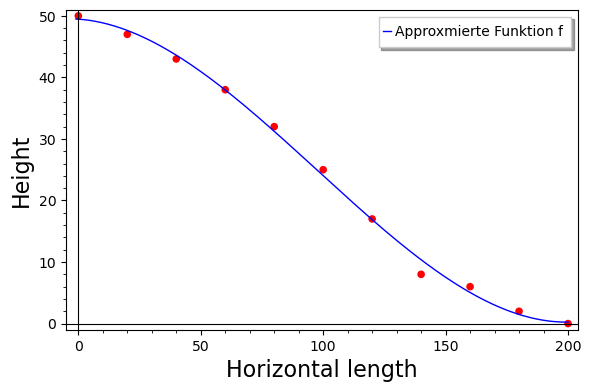

In [24]:
print('Funktion f mit Hügelpunkten:')
plotPointsAndFunction(approx, points)

### Funktion f und deren Ableitung f' in einem Plot darstellen

Funktion f und deren Ableitungsfunktion:


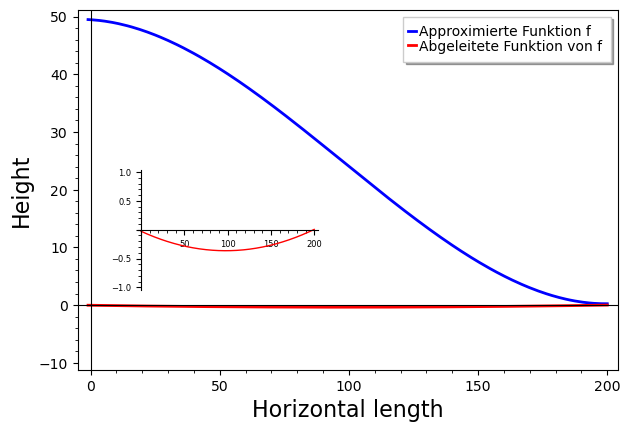

In [25]:
print('Funktion f und deren Ableitungsfunktion:')

plotBothFunctions(approx)

### Bereich der Funktion f berechnen, in denen die Steigung zu groß ist

Intervalle in denen die Steigung zu groß für Asphalt ist:


[(68.25873583808355, 127.11316619418382)]

Intervall markiert im Plot:


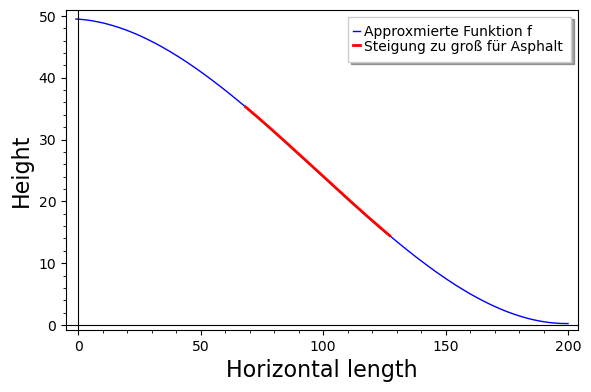

In [26]:
intervals = getGradientExact(f_2, max_gradient, points)

print('Intervalle in denen die Steigung zu groß für Asphalt ist:')
intervals

print('Intervall markiert im Plot:')
paintStairIntervals(intervals, approx)

### Ermittlung genauerer Informationen zu den einzelnen Stufenintervallen

In [27]:
intervals = getAllStairs(intervals, f)

print('Exakte Informationen zu jedem Stufenintervall:')
intervals

print('Ausgabe als Tabelle: ')
printInformationAsTable(intervals, stair_height)

Exakte Informationen zu jedem Stufenintervall:


[{'start': 68.25873583808355,
  'end': 127.11316619418382,
  'stair_length': 0.5654715405330049,
  'amountOfStairs': 104.08026954039981,
  'difference': 20.81605390807996}]

Ausgabe als Tabelle: 


Stair height,Stair Length,Amount
,,
,,


### Ermittlung der Asphaltlänge

In [28]:
length = getAsphaltLength(f_2, intervals)

print('Länge auf der aphaltiert werden muss:')
round(length, 2)

// Giac share root-directory:/usr/share/giac/
// Giac share root-directory:/usr/share/giac/
Added 0 synonyms


Länge auf der aphaltiert werden muss:


144.57

### Kostenermittlung für Asphalt und Stufen

In [29]:
costsAsphalt = costCalculationAsphalt(length, width)
costsStairs = costCalculationStairs(intervals, width)

print('Kosten für Asphalt:')
costsAsphalt

print('Kosten für Stufen:')
costsStairs

Kosten für Asphalt:


3469.73

Kosten für Stufen:


2118.76

### Gesamtkosten

In [30]:
combinedCosts = costsAsphalt + costsStairs

print('Gesamtkosten:')
combinedCosts

Gesamtkosten:


5588.49

### Tool für variable Auswertung

---

Dieses Tool lässt das Programm nochmal durchlaufen, allerdings kann man die festgelegten Werte `stair_heigt`, `width` und `max_gradient` variable über die Slider unten festlegen. Nach einer Änderung an den Slidern berechnet die Methode alle Dinge erneut und gibt die wichtigsten Informationen aus.

In [31]:
@interact
def analyse(Max_Gradient=(0, 1, 0.01), Width=(1, 10, 0.1), Stair_Height=(0, 1, 0.1)):
    """
    Analyse tool for variable gradient.
    
    Parameters:
        Max_Gradient(float): content of slider to perform calculation again with new gradient.
        
    Returns:
        Table: contain all information about the stairs
    """
    approx = getApproxSolution(points, model)
    f(x) = defineFunction(approx, x)
    
    f_2(x) = getDiffOfFunction(f)

    intervals = getGradientExact(f_2, Max_Gradient, points)

    gp = paintStairIntervals(intervals, approx)
    
    intervals = getAllStairs(intervals, f)

    t = printInformationAsTable(intervals, Stair_Height)
    
    length = getAsphaltLength(f_2, intervals)

    costsAsphalt = costCalculationAsphalt(length, Width)
    costsStairs = costCalculationStairs(intervals, Width)

    combinedCosts = costsAsphalt + costsStairs
    
    gp.show()
    print('Länge des Asphalts: ' + str(round(length,2)))
    print('Kosten für Asphalt: ' + str(costsAsphalt))
    print('Kosten für Stufen: ' + str(costsStairs))
    print('Gesamtkosten: ' + str(combinedCosts))
    
    return t

Interactive function <function analyse at 0x7f7fb820f490> with 3 widgets
  Max_Gradient: FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Max_Gradient')
  Width: FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1, description='Width')
  Stair_Height: FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1, description='Stair_Height')

## Fazit
---

Das Projekt hat sein erhofftes Ergebnis erreicht.

Die Hügeldaten konnten mittels SageMath implementiert, visualisiert und beurteilt werden.

Ebenso konnten die Stufenzahl, die Länge der asphaltierten Stücke und die Kosten des gesamten Weges berechnet werden.

Es ensteht ein Problem wenn man mit einer gleichen Stufengröße arbeiten würde. Bei einem Fall wo die Steigung sich stark verändert kann es dazu führen dass die Funktion dies nicht in Betracht zieht und es folgt das die Stufen in den Hügel "hineingehen" würden. Eine Möglichkeit dies zu vermeiden ist im Intervallen die Steigung anzuschauen und sie mit der vorherigen zu vergleichen, bei einem Fall wo die vorherige Steigung kleiner ist als die jetzige würde man ab dort sie "schneiden" und die Stufenfunktion nur bis dahin verwenden. Der Vorgang würde sich immer wiederholen bis wir das gewünschte Ende des Berges erreicht haben. 


## Arbeitsaufteilung
---

- Chris Fröschl: Dokumentation, mathematische Modellierung
- Simon Gärtner: Aufgabe 1, 2, 3, 4, Analyse Tool Dokumentaiton, mathematische Modellierung
- Emils Bundzis: Dokumentation, mathematische Modellierung

## Literatur
---

### Bildquellen

- Bild 1: https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg